# Learning Work Embeddings

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.set_random_seed(42)

## Dataset - IMDB

In [3]:
imdb = keras.datasets.imdb

max_features = 20000

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
# 17465344/17464789 [==============================] - 8s 0us/step


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =25)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =25)

print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

25000 25000
25000 25000
25000 25000
25000 25000


## LSTM

In [4]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128))

lstmModel.add(keras.layers.LSTM(128, dropout=0.2)) #, recurrent_dropout=0.2

lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# train the model

history = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, verbose=1 )

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 112s 6ms/sample - loss: 0.5103 - acc: 0.7393 - val_loss: 0.4768 - val_acc: 0.7608
Epoch 2/15
20000/20000 [==============================] - 110s 6ms/sample - loss: 0.3454 - acc: 0.8489 - val_loss: 0.5016 - val_acc: 0.7602
Epoch 3/15
20000/20000 [==============================] - 120s 6ms/sample - loss: 0.2330 - acc: 0.9035 - val_loss: 0.5999 - val_acc: 0.7616
Epoch 4/15
20000/20000 [==============================] - 133s 7ms/sample - loss: 0.1496 - acc: 0.9417 - val_loss: 0.7581 - val_acc: 0.7544
Epoch 5/15
20000/20000 [==============================] - 142s 7ms/sample - loss: 0.0917 - acc: 0.9649 - val_loss: 0.8958 - val_acc: 0.7588
Epoch 6/15
20000/20000 [==============================] - 150s 7ms/sample - loss: 0.0599 - acc: 0.9791 - val_loss: 1.1558 - val_acc: 0.7448
Epoch 7/15
20000/20000 [==============================] - 167s 8ms/sample - loss: 0.0394 - acc: 0.9869 - val_lo

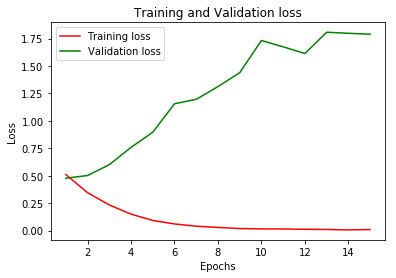

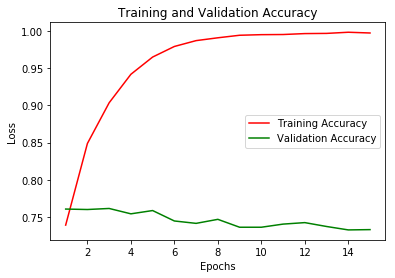

In [7]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

25000/25000 [==============================] - 18s 704us/sample - loss: 1.7381 - acc: 0.7378
1.7381113950538636 0.73784


# Exercise 

Modify the code as per the below instructions
- Use a different dataset.
- Choose a different embedding like word2vec or gensim, if applicable. 
- Modify the architecture, as below
    - Single layer of LSTM and FC
    - Two layers of LSTM and FC
- Change the number of LSTM units in each layer.

